# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [ ]:
ans1 = 0.28
ans2 = 0.92
ans3 = 0.56
ans4 = 0.7

"""
Question 1:

We use the conditional probability formula: P(B|A) = P(A and B)/P(A)
P(A and B) = P(B|A)*P(A) = 0.4*0.7 = 0.28


Question 2:

The Inclusion-Exclusion Principle states:
P(A or B) = P(A) + P(B) - P(A and B) = 0.7 + 0.5 - 0.28 = 0.92


Question 3:

P(A|B) = P(A and B)/P(B) = 0.28/0.5 = 0.56


Question 4:

P(B|Ac) = P(B and Ac)/P(Ac)
P(Ac) = 0.3
P(B and Ac) = P(B) - P(A and B) = 0.5 - 0.28 = 0.22
P(B|Ac) = 0.22/0.3 = 0.73
"""

### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [ ]:
ans1 = 2/13
ans2 = 2598960
ans3 = 1625/4998

"""
Question 1:

P(King or Queen) = Number of Kings + Queens / Total Number of Cards = 8/52 = 2/13


Question 2:

Number of 5-card combinations = Number of ways to choose 5 from 52 = 52!/(5!*47!) = 2598960


Question 3:

Ways of getting 2 red and 3 black cards 
= Number of 2-red-card combinations * Number of 3-black-card combinations
= 26!/(2!*24!) * 26!/(3!*23!) = 325 * 2600 = 845,000

Probability = Ways of getting 2R+3B cards / Total number of 5 card combinations
            = 845,000 / 2,598,960 = 1625/4998 (or 0.3251)

"""

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [2]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    
    def fact(n):
        return np.math.factorial(n)
    
    """
    using the combinations formula with the binomial pdf formula:
    
    combination = n!/(k!*(n-k)!)
    binomial pdf at k: nCk * p**k * (1-p)**(n-k)
    
    """
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [3]:
ans2 = probability_of_scoring_k(22, 3/13, 8)
ans2

0.06532117736042573

3. Plot the probability mass function of $k$ in 22 draws.


In [4]:
k_values = range(22)
probs = [probability_of_scoring_k(22, 3/13, i) for i in k_values]

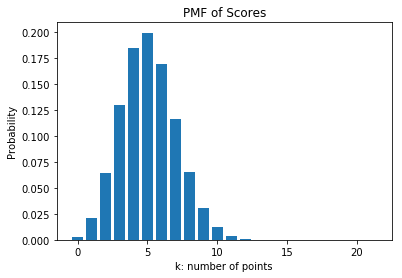

In [8]:
plt.bar(k_values, probs)
plt.title('PMF of Scores')
plt.xlabel('k: number of points')
plt.ylabel('Probability')
plt.show()

4. Plot the cumulative density function of $k$ in 22 draws.

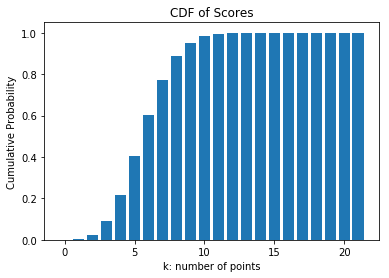

In [9]:
cdf = [sum(probs[0:i]) for i in k_values]
plt.bar(k_values, cdf)
plt.title('CDF of Scores')
plt.xlabel('k: number of points')
plt.ylabel('Cumulative Probability')
plt.show()

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [10]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = np.mean(ratings)
median = np.median(ratings)
mode = stats.mode(ratings)[0][0]
standard_deviation = np.std(ratings)
number_range = [min(ratings), max(ratings)]
interquartile_range = stats.iqr(ratings)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694444444444445 
Median:  8.0 
Mode:  8.0 
Standard Deviation:  2.351942984527715 
Range:  [1, 10] 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [ ]:
# I would use the median because the data is slightly skewed. 

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

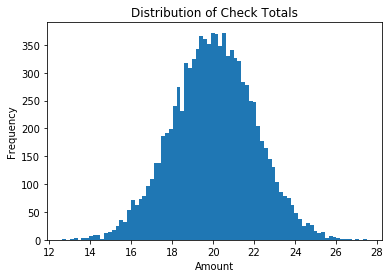

In [11]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [12]:
def z_score(check_amt):
    
    """ Using the formula (X - mu)/std """
    
    return (check_amt - 20)/2

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [13]:
# for alpha = 0.05, the threshold z is 1.64
print(z_score(23), z_score(23) > 1.64)
print(z_score(24), z_score(24) > 1.64)

1.5 False
2.0 True


In [ ]:
ans2 = False
ans3 = True

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [14]:
# 95% confidence interval has z-score of 1.96 (read where p = 0.975)

mean = 20
std = 2
conf = (mean - 1.96*std, mean + 1.96*std)
print("The 95% confidence interval is ", conf)

The 95% confidence interval is  (16.08, 23.92)


In [ ]:
"""
A 95% confidence interval means that there is a 95% chance for the interval to contain the true population mean.

A confidence interval is an interval containing the true population mean with a certain probability. 
i.e. For a 95% confidence interval, there is a 95% chance the interval contains the true population mean.

INCORRECT: a confidence interval contains 95% of all values.
"""

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
Solution: The Central Limit Theorem says that we can take repeated samples of the population, 
and estimate population parameters by finding the average mean and standard deviation of the samples. 
Sample means will also tend to a normal distribution.
"""

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `hypothesis here`

$H_{A}:$ `hypothesis here`

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
"""
Type I: saying queso customers are different when they are the same

Type II: saying queso customers are the same when they are different
"""

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

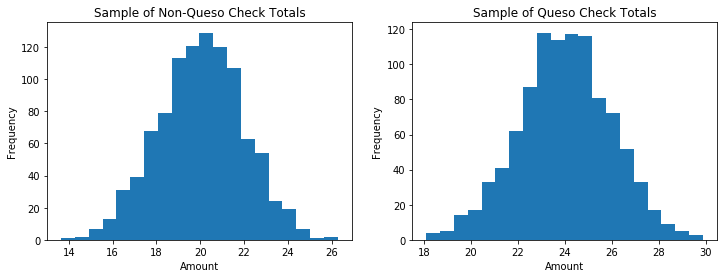

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [16]:
print(stats.ttest_ind(no_queso, queso))

# we reject the null hypothesis because the p-value is less than 0.05

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)


2. What are the conditions required to perform the test you chose?

In [ ]:
"""
Conditions for a two tailed t-test:

data is continuous
data follow a normal distribution
variance of the two populations are equal
two samples are independent
both samples are random samples
"""

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [ ]:
ans1 = 0.2
ans2 = 0.02/0.46
ans3 = "Pet Store" # pet store! (0.12 vs 0.08)
ans4_prior = "P(Store)"
ans4_posterior = "P(Store | Large)"
ans4_likelihood = "P(Large | Store)"

"""
Qustion 1:

P(Small) = P(Small|Pet Store) + P(Small|Pound) = 0.2*0.6 + 0.8*0.1 = 0.2

Question 2:

P(Pet Store|Large)  = P(Large|Pet Store)*P(Pet Store) / P(Large) 
                    = 0.1*0.2 / (0.1*0.2 + 0.55*0.8)
                    = 0.02 / 0.46 = 0.04348
                    
Question 3:

P(Pet Store|Small) = 0.6
P(Pound|Small) = 0.4

More likely he went to the pet store.

Question 4:
P(Pet Store|Large) = P(Large|Pet Store)*P(Pet Store) / P(Large) 

Prior: P(Store)
Posterior: P(Store | Large)
Likelihood: P(Large | Store)
"""